**SYS**

Модуль sys предоставляет программисту набор функций, которые дают информацию о том, как интерпретатор Python взаимодействует с операционной системой.
Модуль sys даёт следующую информацию:

    - Какая версия Питона запущена.
    - Путь к интерпретатору Python, исполняющему текущий скрипт.
    - Параметры командной строки, используемые при запуске на выполнение скрипта.
    - Флаги, установленные интерпретатором.
    - Представление значений с плавающей точкой.
    - Многое другое.


**sys.argv**

Значение sys.argv – это список аргументов командной строки, которые причастны к скрипту Python. 

In [43]:
import sys
print(sys.argv)

['D:\\anaconda\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\cryin\\AppData\\Roaming\\jupyter\\runtime\\kernel-89c75d79-5419-4bf3-bbab-b207a8f163e0.json']


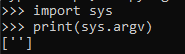

**sys.executable**

Значение sys.executable – это полный путь к интерпретатору Python. 


In [44]:
print(sys.executable)

D:\anaconda\python.exe


**sys.exit**

Данная функция позволяет разработчику выйти из Python.

sys.exit(0)

In [45]:
import subprocess
 
code = subprocess.call(["python.exe", "exit.py"])
print(code)

0


**sys.path**

Значение функции path модуля sys – это список строк, которые указывают путь поиска для модулей. 

In [46]:
print(sys.path)

['C:\\Users\\cryin', 'D:\\anaconda\\python38.zip', 'D:\\anaconda\\DLLs', 'D:\\anaconda\\lib', 'D:\\anaconda', '', 'D:\\anaconda\\lib\\site-packages', 'D:\\anaconda\\lib\\site-packages\\win32', 'D:\\anaconda\\lib\\site-packages\\win32\\lib', 'D:\\anaconda\\lib\\site-packages\\Pythonwin', 'D:\\anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\cryin\\.ipython']


Добавление пути:

In [47]:
if "/path/to/my/module" not in sys.path:
    sys.path.append("/path/to/my/module")
print(sys.path)

['C:\\Users\\cryin', 'D:\\anaconda\\python38.zip', 'D:\\anaconda\\DLLs', 'D:\\anaconda\\lib', 'D:\\anaconda', '', 'D:\\anaconda\\lib\\site-packages', 'D:\\anaconda\\lib\\site-packages\\win32', 'D:\\anaconda\\lib\\site-packages\\win32\\lib', 'D:\\anaconda\\lib\\site-packages\\Pythonwin', 'D:\\anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\cryin\\.ipython', '/path/to/my/module']


In [48]:
if "/path/to/my/module" in sys.path:    
    sys.path.remove("/path/to/my/module")
print(sys.path)

['C:\\Users\\cryin', 'D:\\anaconda\\python38.zip', 'D:\\anaconda\\DLLs', 'D:\\anaconda\\lib', 'D:\\anaconda', '', 'D:\\anaconda\\lib\\site-packages', 'D:\\anaconda\\lib\\site-packages\\win32', 'D:\\anaconda\\lib\\site-packages\\win32\\lib', 'D:\\anaconda\\lib\\site-packages\\Pythonwin', 'D:\\anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\cryin\\.ipython']


**sys.platform**

Значение sys.platform – идентификатор платформы.

In [49]:
print(sys.platform)

win32


In [51]:
os = sys.platform
if os == 'win32':
    print(subprocess.Popen(["cmd","dir","c:\\Users"]))
elif os.startswith('linux'):
    subprocess.Popen(["ls, -l"])

**sys.maxsize**

Эта функция возвращает целое число, которое обозначает, какое максимально значение может иметь переменная типа Py_ssize_t в программе Python.

In [52]:
print(sys.maxsize)

9223372036854775807


**sys.version**

Этот метод показывает версию интерпретатора Python. Он также предоставляет информацию о номере сборки и компиляторе.

In [54]:
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


**sys.stdin / stdout / stderr**

Stdin, stdout и stderr сопоставляются с файловыми объектами, которые соответствуют стандартным входам, выходам и потокам ошибок интерпретатора соответственно. Функция stdin используется для всех входов, используемых интерпретатором, за исключением скриптов, тогда как stdout используется для выходов операторов print и expression. Главная причина, по которой я акцентирую на этом внимание, заключается в том, что в какой-то момент вам нужно будет перенаправить stdout или stderr, или обе функции к файлу, такому как log, либо же какой-либо дисплей в пользовательском графическом интерфейсе, созданным вами. Вы также можете перенаправить stdin, но с такими случаями я практически не сталкивался.

**sys.getwindowsversion**

Функция работает только с Windows. Она возвращает кортеж, описывающий, какая версия Windows сейчас запущена. 

In [58]:
print(sys.getwindowsversion())
print(sys.getwindowsversion().platform_version)


sys.getwindowsversion(major=10, minor=0, build=18363, platform=2, service_pack='')
(10, 0, 18362)


**sys.modules**
Словарь, дающий информацию о загруженных в скрипт модулях.

In [68]:
'sys' in sys.modules

True